# Регрессия на чистых данных

Построить предиктивную модель предсказания целевой переменной в зависимости от значения нескольких факторов

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm

### 2. Загрузите датасет

In [2]:
# Читаем данные с .csv с помощью pandas
names_list_x =['x1','x2','x3','x4','x5','x6','x7']
names_list_y = ["Y"]

x = pd.read_csv('input/8_x.csv',names=names_list_x)
y = pd.read_csv('input/8_y.csv', names = names_list_y)

In [3]:
x.head()

,x1,x2,x3,x4,x5,x6,x7
0,1.514584,-0.621563,-1.277379,-1.236340,0.449646,-0.713396,-0.008099
1,0.120996,0.969454,0.572916,-0.449216,-1.231906,-0.154540,-0.217604
2,0.091450,-1.781662,0.971287,-0.342499,0.358784,-0.474612,-0.629888
3,-1.128455,-1.036818,0.594698,-0.613796,2.937939,1.617190,0.236998
4,0.868826,-0.913182,0.366585,-0.254660,-0.185404,-0.863618,0.214062


In [4]:
y.head()

,Y
0,-88.370484
1,-33.342405
2,-132.859442
3,156.519597
4,-71.378443


###  3. Сделайте количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.




In [5]:
print(x.shape)
x.describe()

(83, 7)


,x1,x2,x3,x4,x5,x6,x7
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,0.083742,-0.038892,-0.077287,0.202356,0.111821,-0.106154,-0.044355
std,1.181994,0.941986,0.891228,1.226907,1.019480,1.007005,0.929658
min,-3.545896,-1.889278,-2.538651,-2.502444,-2.621536,-2.452811,-2.007143
25%,-0.589996,-0.687546,-0.486259,-0.611158,-0.590063,-0.760261,-0.748415
50%,0.120996,-0.099994,0.020013,0.133044,0.150418,-0.154540,-0.009249
75%,0.831314,0.692257,0.559829,1.199444,0.715865,0.658789,0.680093
max,2.470810,2.157520,1.884430,2.594291,2.937939,1.626076,1.909412


In [6]:
print(y.shape)
y.describe()

(83, 1)


,Y
count,83.000000
mean,-9.601932
std,120.800458
min,-336.124426
25%,-87.287939
50%,-2.394386
75%,67.341250
max,221.017606


###  4. Разделите все наблюдения на обучающую и тестовую выборки в соотношении 80-20.


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### 5. Для целевой и каждого из признаков постройте парную регрессионную модель. Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.

Т.к. у нас 7 факторов, то чтобы код не повторялся, пишем универсальный метод

In [8]:
def calc(arg):
    
    values = x_test[[arg]].values
    #Создаем линейную регрессию
    reg = LinearRegression()

    y = reg.fit(x_train[[arg]].values, y_train.values)
    #Делаем прогноз по значениям
    y_model = y.predict(values)
    
    #Построение графика
    plt.plot(values, y_model, color='red')
    plt.scatter(values, y_test.values, color='black')

    #Возвращаем критерий R^2
    return y.score(values,  y_test.values)

##### Критерий x1

R2 = -0.2582621830577909


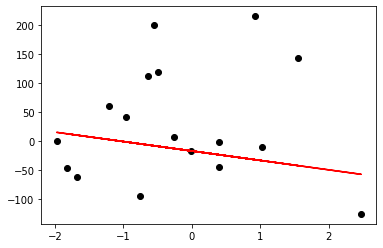

In [9]:
print(f"R2 = {calc('x1')}")

Связь очень слабая

##### Критерий x2

R2 = -0.2232804435259741


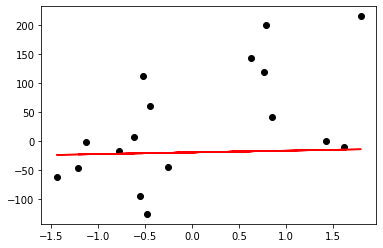

In [10]:
print(f"R2 = {calc('x2')}")

Связь очень слабая

##### Критерий x3

R2 = -0.25364078580190386


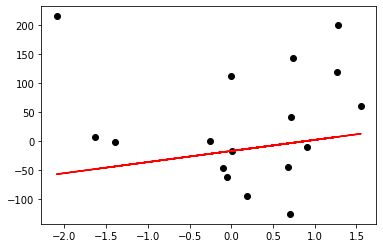

In [11]:
print(f"R2 = {calc('x3')}")

Связь очень слабая

##### Критерий x4

R2 = -0.4502474654576698


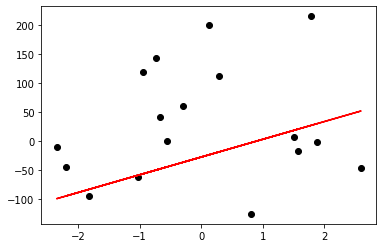

In [12]:
print(f"R2 = {calc('x4')}")

Связь очень слабая

##### Критерий x5

R2 = -0.25972129669831867


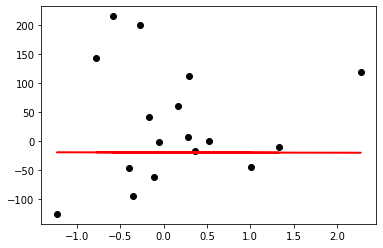

In [13]:
print(f"R2 = {calc('x5')}")

Связи практически нет

##### Критерий x6

R2 = -0.016659396639436386


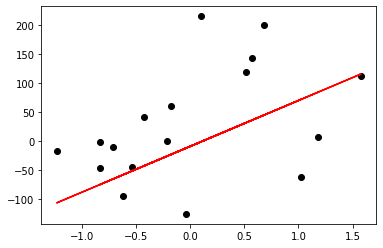

In [14]:
print(f"R2 = {calc('x6')}")

Связь средняя

##### Критерий x7

R2 = 0.5104830991038554


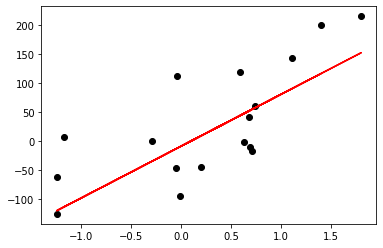

In [15]:
print(f"R2 = {calc('x7')}")

Связь средняя

В ходе наблюдения есть критерии с повышенной связанностью - x6, x7

###  6. Постройте модель множественной линейной регрессии целевой переменной от всех показателей. Оцените качество регрессии, сделайте вывод.

In [16]:
current_formula = "y~x1+x2+x3+x4+x5+x6+x7"
data = pd.DataFrame(np.array(x_train[names_list_x]), columns=names_list_x)

data['y'] = np.array(y_train)
columns = data.columns.tolist()
columns = columns[-1:] + columns[:-1]
data = data[columns]

m = sm.ols(formula=current_formula, data=data)
fitted = m.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1524.
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           2.83e-63
Time:                        19:28:45   Log-Likelihood:                -239.29
No. Observations:                  66   AIC:                             494.6
Df Residuals:                      58   BIC:                             512.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2621      1.284      0.204      0.839      -2.309       2.833
x1            -0.5815      1.048     -0.555      0.581      -2.680       1.517
x2            16.7111      1.361     12.280      0.000      13.987      19.435
x3             1.5961      1.449      1.101      0.275      -1.305       4.497
x4            14.3166      1.070     13.381      0.000      12.175      16.458
x5             6.2625      1.152      5.438      0.000       3.957       8.568
x6            83.0595      1.169     71.027      0.000      80.719      85.400
x7            96.3050      1.345     71.614      0.000      93.613      98.997
==============================================================================
Omnibus:                        2.080   Durbin-Watson:                   2.382
Prob(Omnibus):                  0.353   Jarque-Bera (JB):                1.866
Skew:                           0.300   Prob(JB):                        0.393
Kurtosis:                       2.436   Cond. No.                         1.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Итоги

##### Влияние коэффициентов

При построении многофакторной модели R2 = 0.99, что сигнализирует об очень сильной связанности. Больше всего этому способствуют фаторы x6 и x7. Также за это выступают коэффициенты однофакторных моделей, построенным по этим критериям x6 и x7 (0.56 и 0.38 соответственно)

##### Значимость регрессии

F-статистика = 1.69e-61 = 0 значима
Автокорреляция = 2.131 => aвтокорреляция отсутствует (1.5 < 2.131 < 2.5)

##### Итог
Модель можно использовать